# Computer Vision, Fall 2024

#### Name: 

#### <font color='red'>Exercise 2, return latest on Sunday 22.9.2024 at 23.50 via Moodle</font>

Return the answer in PDF and Jupyter Notebook formats.


## Ex 2.1 Edge detection and image filtering. (3 points)

<img src="images/convolve.gif" width="500" align="center">

#### (a) Implement convolution function
   - Implement convolution function to filter images with the user-defined kernel.
   - Expect kernel sizes to be 3x3, 5x5, 7x7 or 9x9.
   - In this exercise, we use only 1-channel grayscale images.
   - Convolution function will be used in exercises 2.1b and 2.1c.
  

In [1]:
# Import Python packages needed in exercise 2.1
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [10]:
def convolution(img, kernel):
    """
    Args: 
       img: 1-channel grayscale image
       kernel: kernel to use in convolution.
    
    Returns: 
        Convolved image
    """
    kernel_size = kernel.shape[0]
    h, w = img.shape
    
    # Calculate shape of output (assume kernel always has odd dimension)
    k = int(kernel_size / 2)
    

    # Calculate output
    tmp = np.zeros_like(img, dtype=np.float32)

    for i in range(w - 2 * k):
        for j in range(h - 2 * k):
            # calculate coordinate of convoluted image
            i_conv, j_conv = i + k, j + k
            
            tmp[j_conv, i_conv] = np.sum(kernel * img[j: j + 2*k + 1, i: i + 2*k +1])

    output = np.rint(tmp[k:h-k, k:w-k]).astype(np.uint8)
    
    return output

#### (b) Implement create_box_filter function and filter image

- Implement function to create different size box filters
- Read image "images/norway.jpeg" and convert it to grayscale
- Use your convolution function to filter the image with box filters
- Try different box filter sizes. How does the box size affect the result?

In [5]:
def create_box_filter(size):
    """
    Args: 
        size: Integer that defines size of the box filter.
    
    Returns: 
        box filter with shape size x size.
    """
    return 1.0 / np.square(size) * np.ones((size, size))

create_box_filter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [6]:
path = "images/norway.jpg"

img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

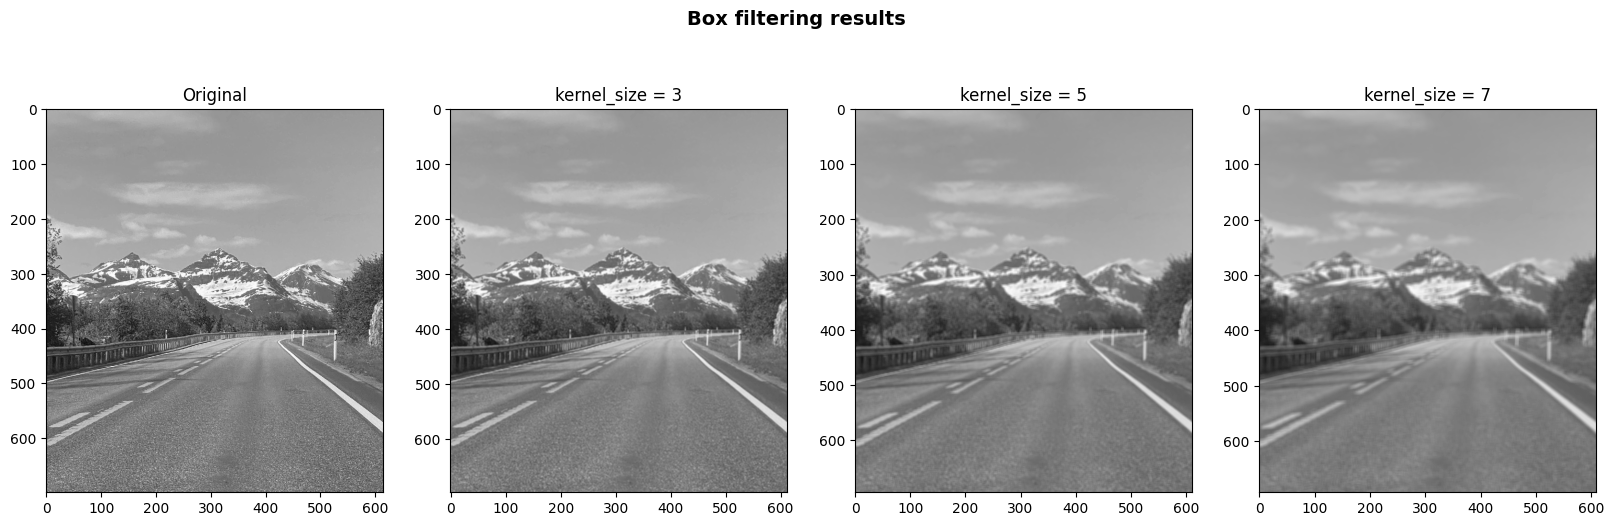

In [7]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle("Box filtering results", fontsize=14, fontweight='bold')

ax = fig.add_subplot(141)
ax.imshow(img, cmap='gray', vmin=0, vmax=255)
ax.set_title("Original")

for idx, k in enumerate([3, 5, 7]):
    ax = fig.add_subplot(1, 4, 2 + idx)
    ax.imshow(convolution(img, create_box_filter(k)), cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"kernel_size = {k}")

In [ ]:
# Code to check convoluted image vs function in opencv2

# ksize = 7
# k = int(ksize / 2)
# filtered = cv2.boxFilter(img,-1, (ksize, ksize), normalize=True)
# filtered = filtered[k:h-k, k:w-k]

# conv = convolution(img, create_box_filter(ksize))
# np.sum(conv - filtered)

#### HoangLe: Observation as applying different size of kernel:

As increasing the kernel size, the image is more blurred.

#### (c) Implement create_gaussian_filter function and filter image

- Implement function to create a gaussian filters
- Read image images/norway.jpeg and convert it to grayscale
- Use your convolution function to filter the image with the different gaussian filters
- How does the change of sigma value and kernel size affect the results? Try with different values.


In [67]:
def create_gaussian_filter(size, sigma):
    """
    Args: 
        size: Integer that defines size of the gaussian filter.
        sigma: Standard deviation of Gaussian distribution
    
    Returns: 
        gaussian filter with shape size x size and user defined sigma
    """
    kernel = np.zeros((size, size))
    k = size // 2

    for i in range(-k, k+1):
        for j in range(-k, k+1):
            kernel[i + k, j + k] = np.exp(-(np.square(i) + np.square(j)) / (2 * np.square(sigma)))

    kernel *= 1.0 / (2 * np.pi * np.square(sigma))

    kernel = kernel * 1.0 / np.sum(kernel)

    return kernel

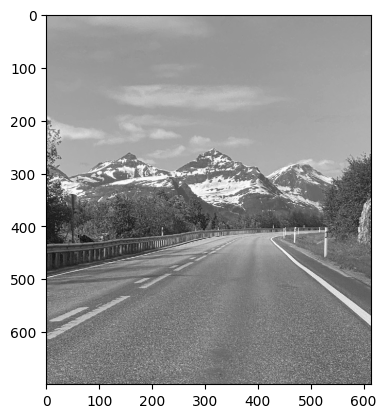

In [72]:
path = "images/norway.jpg"

img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

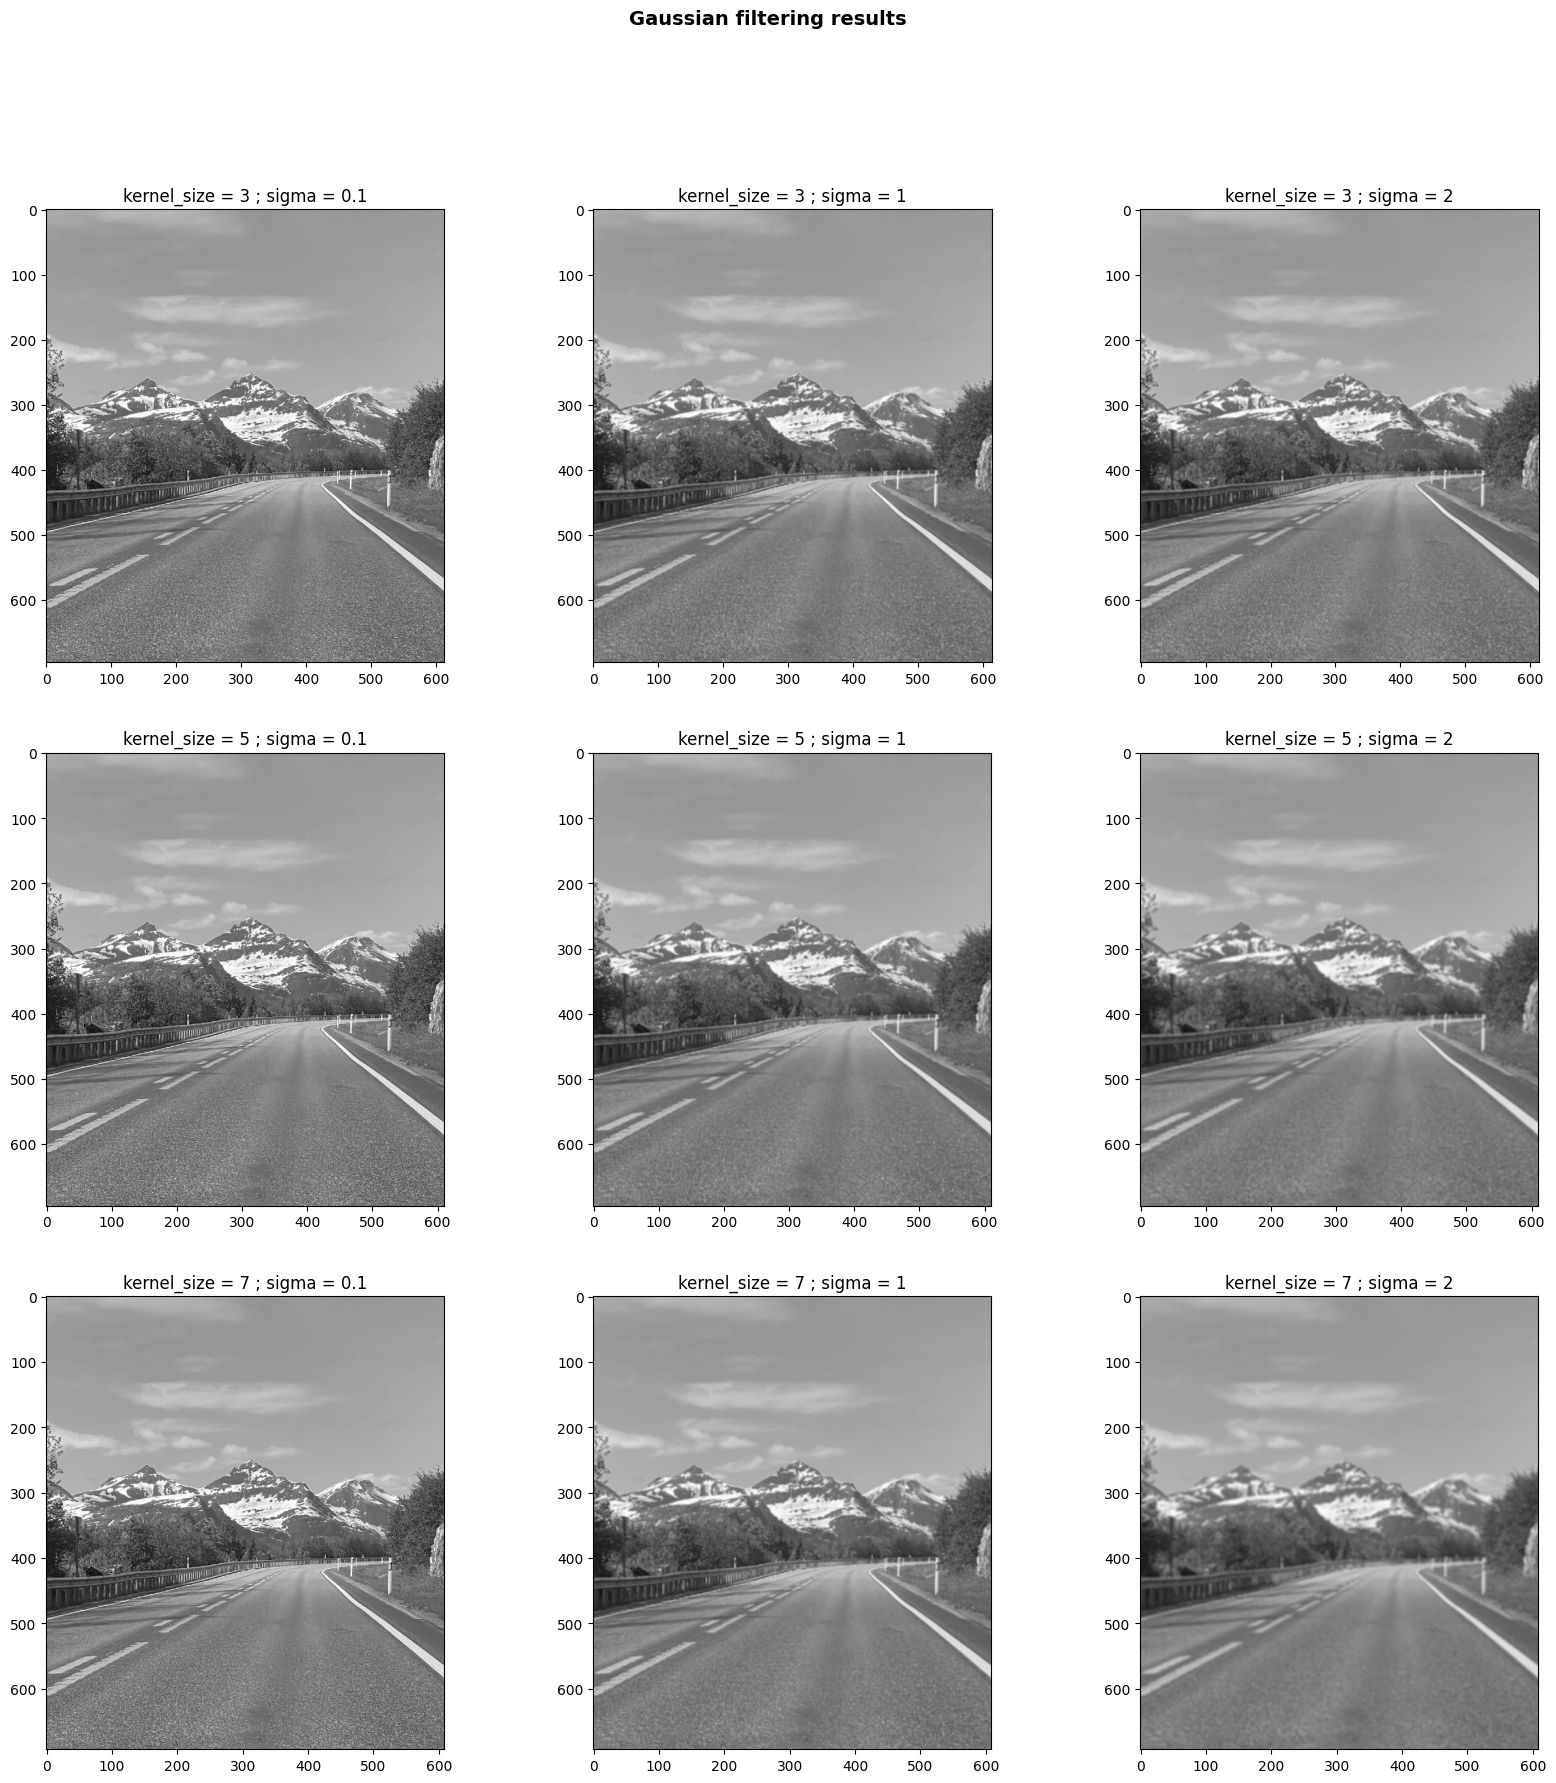

In [76]:
from itertools import product

fig = plt.figure(figsize=(20, 20))
fig.suptitle("Gaussian filtering results", fontsize=14, fontweight='bold')

for idx, (k, sigma) in enumerate(product([3, 5, 7], [0.1, 1, 2])):
    ax = fig.add_subplot(3, 3, 1 + idx)
    ax.imshow(convolution(img, create_gaussian_filter(k, sigma=sigma)), cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"kernel_size = {k} ; sigma = {sigma}")

#### HoangLe: Observation as applying different size and sigma of kernel:

As increasing the kernel size and sigma, the image is more blurred.

In [81]:
# Code to check convoluted image vs function in opencv2

# ksize = 5
# k = ksize // 2
# h, w = img.shape
# sigma = 1.0

# filtered = cv2.GaussianBlur(img, (ksize, ksize), sigma)
# filtered = filtered[k:h-k, k:w-k]
# print(filtered)

# print(convolution(img, create_gaussian_filter(ksize, sigma=1)))

#### (d) Edge detection

   - Search edges from the original image and from all filtered images using OpenCV Canny edge detector. Visualize results.
   - Which filter provides the best result? Why? Consider the best result to be one that could be used by the autonomous vehicle to stay in its lane (clear line markings and minimal amount of image noise).

Hint:
 - [OpenCV Canny Edge Detection](https://docs.opencv.org/5.x/da/d22/tutorial_py_canny.html)

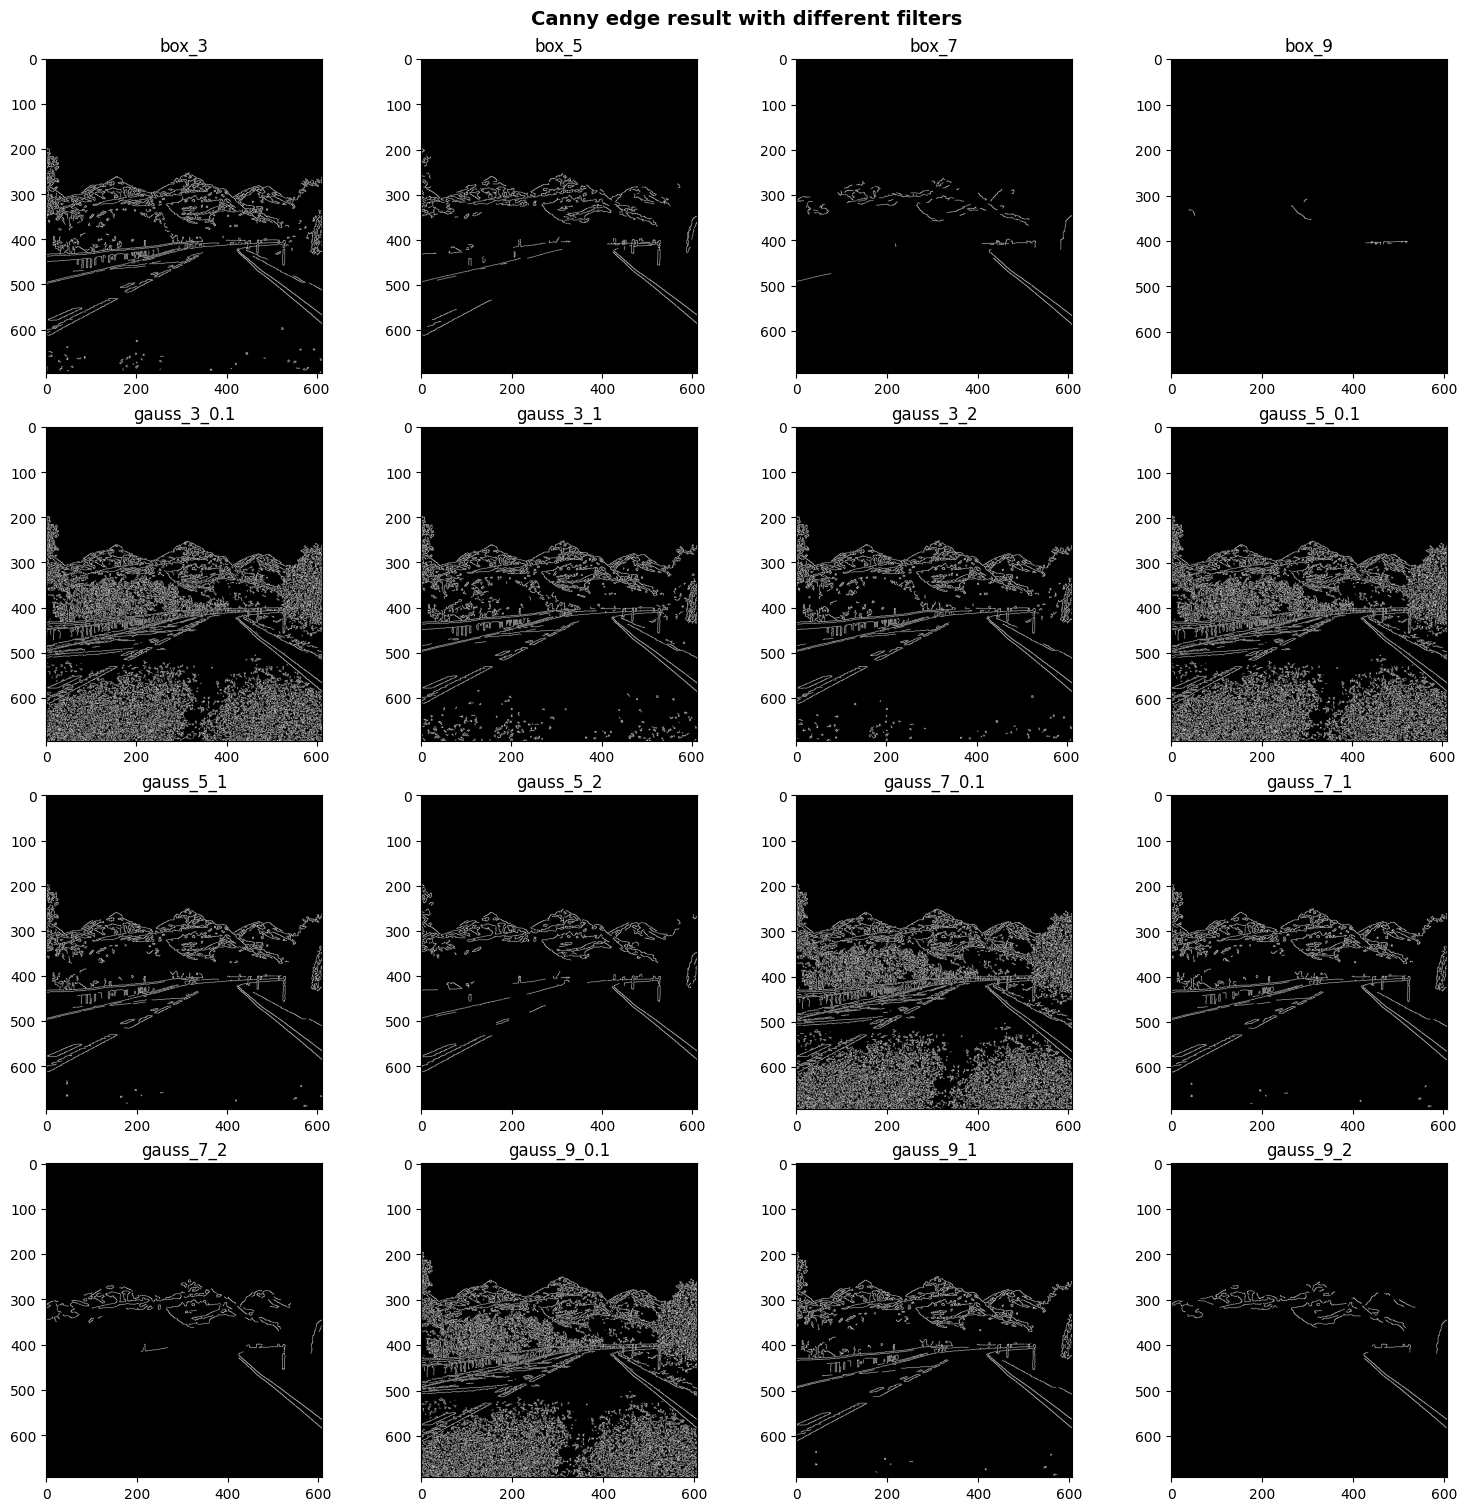

In [90]:
filters = [(f"box_{k}", create_box_filter(k)) for k in [3, 5, 7, 9]]
filters.extend([
    (f"gauss_{k}_{sigma}", create_gaussian_filter(k, sigma))
    for (k, sigma) in product([3, 5, 7, 9], [0.1, 1, 2])
])

fig = plt.figure(figsize=(15, 15), layout="constrained")
fig.suptitle("Canny edge result with different filters", fontsize=14, fontweight='bold')

for idx, (name, filter) in enumerate(filters):
    img_filtered = convolution(img, filter)
    edges = cv2.Canny(img_filtered, 100, 200)

    ax = fig.add_subplot(4, 4, 1 + idx)
    ax.imshow(edges, cmap='gray', vmin=0, vmax=255)
    ax.set_title(name)

#### HoangLe: Most suitable filter for autonomous vehicle:

It seems the best filter resulting the least noise and the clear lane is *Gaussian filter with kernel = 5 and sigma = 1*

## Ex 2.2 Detect and match features (3 p)

#### (a) Detect and visualize SIFT features

 - Read images "images/GOPR1515_03850" and "images/GOPR1515_03852" and convert them to grayscale
 - Run OpenCV SIFT feature detection
 - Visualize found SIFT keypoints from both images

Hints:

 -  We provide you a function visualize_features which can be used to visualize your results.
 - Depending on your OpenCV version, you may need to install OpenCV contrib package: [Link to opencv-contrib-python](https://pypi.org/project/opencv-contrib-python/)
 - OpenCV material that may be useful: 
    - [OpenCV cv::KeyPoint Class Reference](https://docs.opencv.org/5.x/d2/d29/classcv_1_1KeyPoint.html)
    - [OpenCV cv::Feature2D Class Reference](https://docs.opencv.org/5.x/d0/d13/classcv_1_1Feature2D.html)
    - [Introduction to SIFT (Scale-Invariant Feature Transform in OpenCV)](https://docs.opencv.org/5.x/da/df5/tutorial_py_sift_intro.html)

In [1]:
def visualize_features(image, kp):
    """
    Visualize extracted features in the image

    Arguments:
       image: a grayscale image
       kp: list of the extracted keypoints

    Returns:
    """
    display = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(display)
    

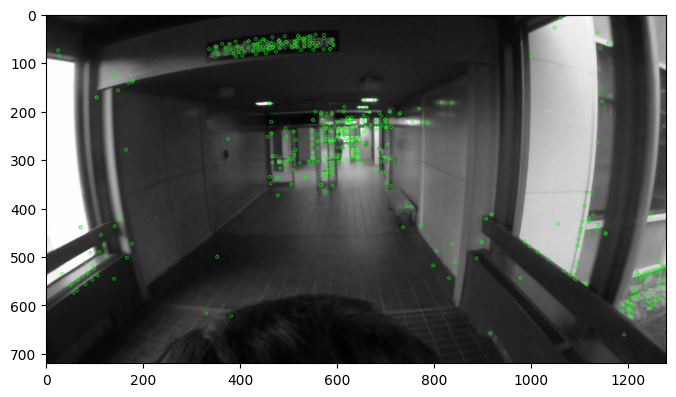

In [44]:
path1 = "images/GOPR1515_03850.jpg"
img1_gray = cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kps_img1, des_img1 = sift.detectAndCompute(img1_gray,None)

visualize_features(img1_gray, kps_img1)

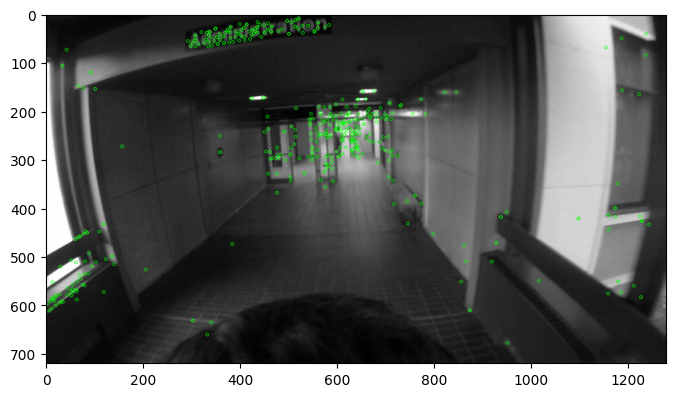

In [45]:
path2 = "images/GOPR1515_03852.jpg"
img2_gray = cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kps_img2, des_img2 = sift.detectAndCompute(img2_gray, None)

visualize_features(img2_gray, kps_img2)

#### (b) Feature matching

 - Implement feature matching algorithm (you can use OpenCV matching algorithm only to verify your results).
 - How good is the result? How could you improve it?

Hint:
   - We provide you a function visualize_matches which can be used to visualize your results.
   - [OpenCV Feature Matching tutorial. Do not use ready made matching algorithm in this exercise!](https://docs.opencv.org/5.x/dc/dc3/tutorial_py_matcher.html)

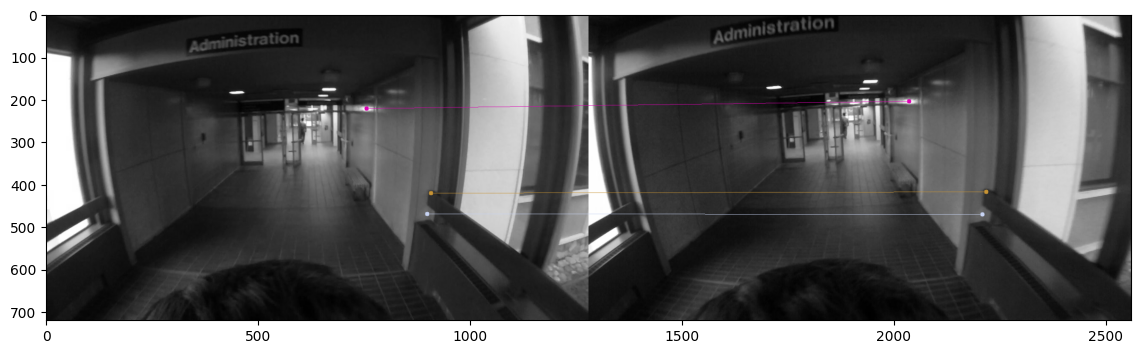

In [18]:
import random

def visualize_matches(image01, kp01, image02, kp02, matches):
    """
    Visualize corresponding matches in two images

    Arguments:
        image1: the first image in a matched image pair
        kp1: list of the keypoints in the first image
        image2: the second image in a matched image pair
        kp2: list of the keypoints in the second image
        matches: list of keypoint index pairs of matched features. Example format: [(0,2), (1,4), (5,10)].

    Returns:
    """
    # Get width of the first image
    _ , width = image01.shape
    
    # Concatenate images
    img = cv2.hconcat([image01, image02])
    
    # Convert image from gray to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Add matches to image
    for match in matches:
        
        # Get random color
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        color = (r,g,b)
        
        # Get coordinates
        point_img01 = kp01[match[0]].pt
        point_img02 = kp02[match[1]].pt
        
        # Get x and y values from coordinates
        x_img01 = int(point_img01[0])
        y_img01 = int(point_img01[1])
        x_img02 = int(point_img02[0]) + width
        y_img02 = int(point_img02[1]) 
        
        # Draw small circle to matched keypoints
        cv2.circle(img, (x_img01, y_img01), radius=5, color=color, thickness=-1)
        cv2.circle(img, (x_img02, y_img02), radius=5, color=color, thickness=-1)
        
        # Draw line between matches
        cv2.line(img, (x_img01, y_img01), (x_img02, y_img02), color, thickness=1)
    
    # Show image with matches
    plt.figure(figsize=(14, 14), dpi=100)
    plt.imshow(img)
    
# Dummy matches to test visualize_matches function.
# You can try it after you have read images and extracted keypoints in exercise 2.2a.
matches = [(382, 422), (384, 424), (368, 407)]
visualize_matches(img01, keypoints01, img02, keypoints02, matches)

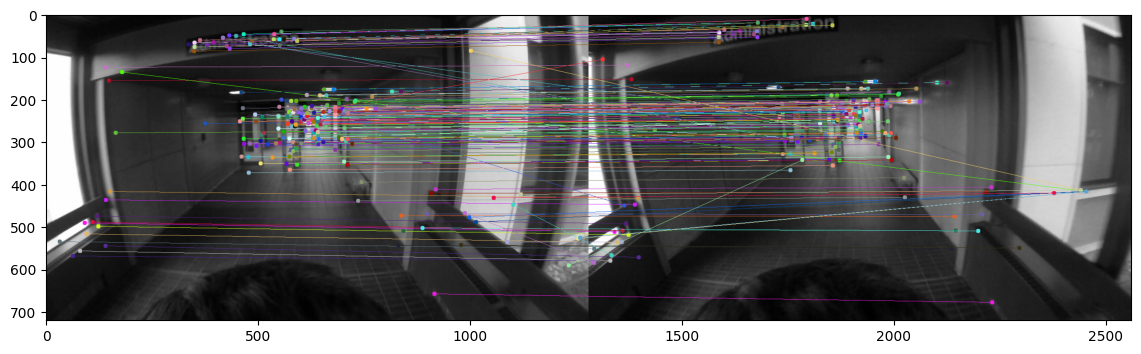

In [58]:
THETA = .8
def dist_l2(a: np.ndarray, b: np.ndarray):
    return np.sqrt(np.square(a - b).sum())

matches = []

for i, (_, des1) in enumerate(zip(kps_img1, des_img1)):
    # Calculate distance to every keypoints in 2nd image
    distances = [
        (j, dist_l2(des1, des2))
        for j, (_, des2) in enumerate(zip(kps_img2, des_img2))
    ]
    

    distances = sorted(distances, key=lambda x: x[1])

    # Calculate ratio of 2 closest keypoints and compare with threshold THETA
    kp_closest_1, kp_closest_2 = distances[0], distances[1]
    r = kp_closest_1[1] / kp_closest_2[1]

    if r <= THETA:
        matches.append((i, kp_closest_1[0]))

    # break

visualize_matches(img1_gray, kps_img1, img2_gray, kps_img2, matches)

## Exercise 2.3: Fourier Transform (2 points)

**Helpful resources:**

- You may utilize either OpenCV or NumPy for FFT and image rotation operations. You can use ready-made functions, don't have to implement FFT from scratch.
- Refer to this link for a detailed OpenCV Fourier Transform tutorial: [OpenCV Fourier Transform Tutorial](https://docs.opencv.org/5.x/de/dbc/tutorial_py_fourier_transform.html)

### Task (a): Evaluating Image Orientation in Signal Space

1. Load the image 'images/son3.png'.
2. Create three copies of the image: one in the original orientation, one rotated by 30 degrees, another by 60 degrees, and the last one by 90 degrees.
3. Perform the Fast Fourier Transform (FFT) followed by an FFT shift on all four images. Then visualize their magnitude spectrums.
4. Observe and describe the orientation of the text in the magnitude images.
5. Explain what causes the appearance of horizontal and vertical lines in the FFT magnitude spectrum. What is the x-axis and y-axis in the frequency domain?

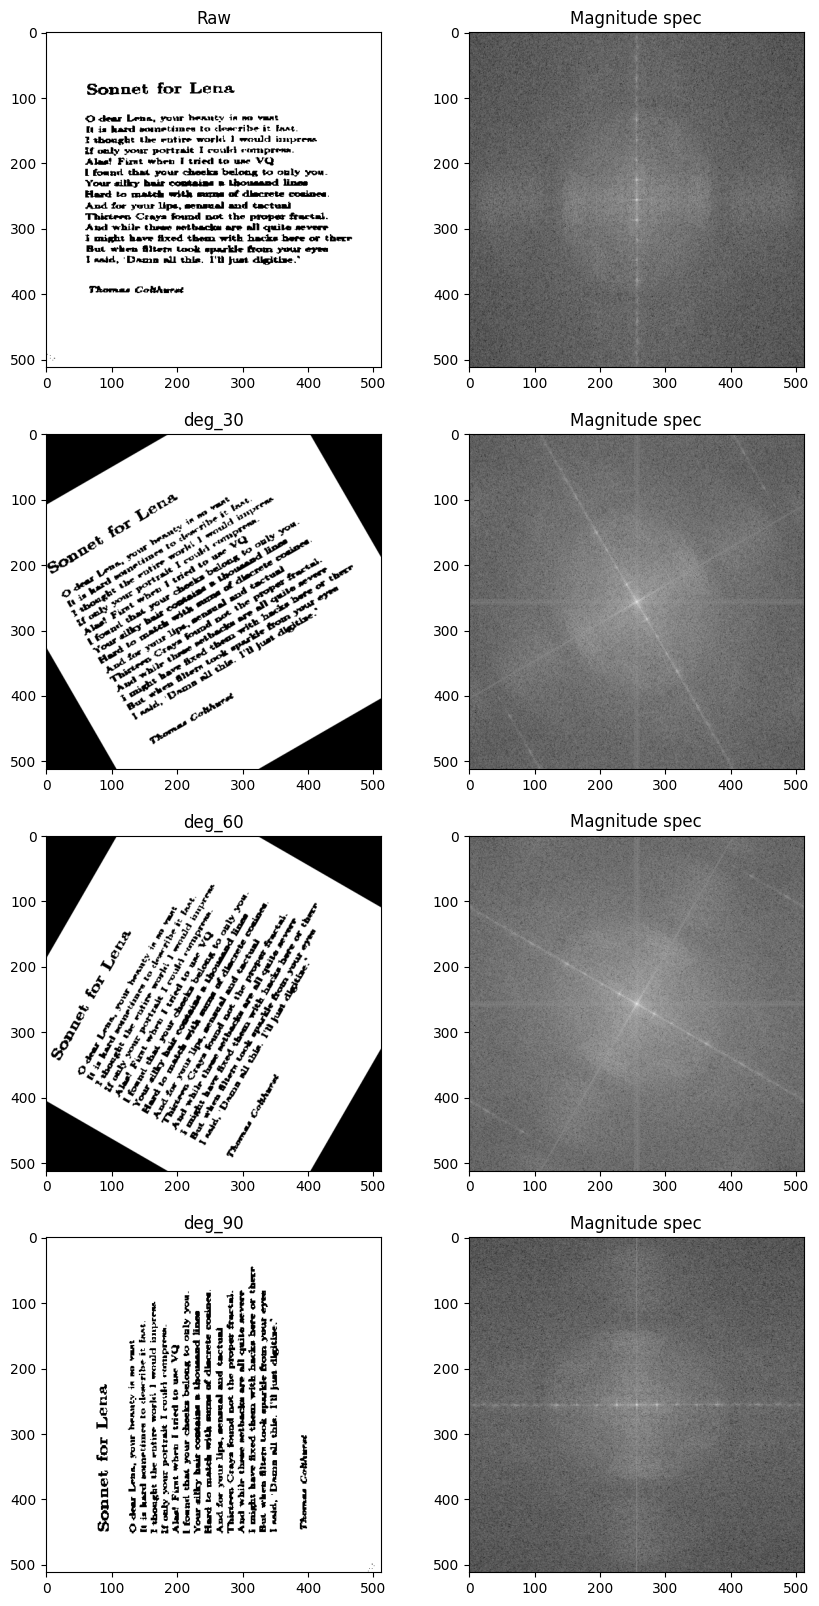

In [2]:
path = "images/son3.png"
img_raw = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

# Rotate images
h, w = img_raw.shape[:2]
cX, cY = w // 2, h // 2

img_deg30 = cv2.warpAffine(img_raw, cv2.getRotationMatrix2D((cX, cY), 30, 1.0), (w, h))
img_deg60 = cv2.warpAffine(img_raw, cv2.getRotationMatrix2D((cX, cY), 60, 1.0), (w, h))
img_deg90 = cv2.warpAffine(img_raw, cv2.getRotationMatrix2D((cX, cY), 90, 1.0), (w, h))

# Perform FFT and shift and visualize
fig = plt.figure(figsize=(10, 20))

pairs = [("Raw", img_raw), ("deg_30", img_deg30), ("deg_60", img_deg60), ("deg_90", img_deg90)]
for idx, (name, img) in enumerate(pairs):
    fshift = np.fft.fftshift(np.fft.fft2(img))
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    ax = fig.add_subplot(4, 2, idx * 2 + 1)
    ax.imshow(img, cmap = 'gray')
    ax.set_title(name)

    ax = fig.add_subplot(4, 2, idx * 2 + 2)
    ax.imshow(magnitude_spectrum, cmap = 'gray')
    ax.set_title('Magnitude spec')

Answer:

4. From the logarithmic magnitude spectrum, we can see the white line forms the 30o and 60o angle with the verticle axis, this indicates that the text orientation forms the corresponding 30o or 60o angle with the horizontal direction in the original image.

5. The appearance of horizontal and vertical lines indicate 2 dorminating directions and they come from the background pattern. 

In frequency domain, x-axis presents the frequency and y-axis presents the signal amplitude.

### Task (b) High Pass Filter and Low Pass Filter

1. Open the image 'images/lenna.png' and convert it into grayscale.
2. Conduct a Fast Fourier Transform (FFT) on this image.
3. Next, create two copies of the Fourier magnitude spectrum. For one copy, apply a low pass filter (LPF) and for the other, apply a high pass filter (HPF). In both cases, utilize a circular mask with a 30-pixel radius for the filtering process. You can use the function create_circular_mask() below to create the mask for the filters.

In [3]:
def create_circular_mask(img, radius):
    # Get image size
    h, w = img.shape
    
    # Get center coordinate
    center = (int(w/2), int(h/2))

    # Make open multi-dimensional “meshgrid”
    Y, X = np.ogrid[:h, :w]
    
    # Calculate distance from the image center to every pixel
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    # Threshold the result with the user defined radius
    mask = dist_from_center <= radius
 
    # Convert mask from boolean array to integer array
    return mask.astype(int)

Text(0.5, 1.0, 'High-pass filter')

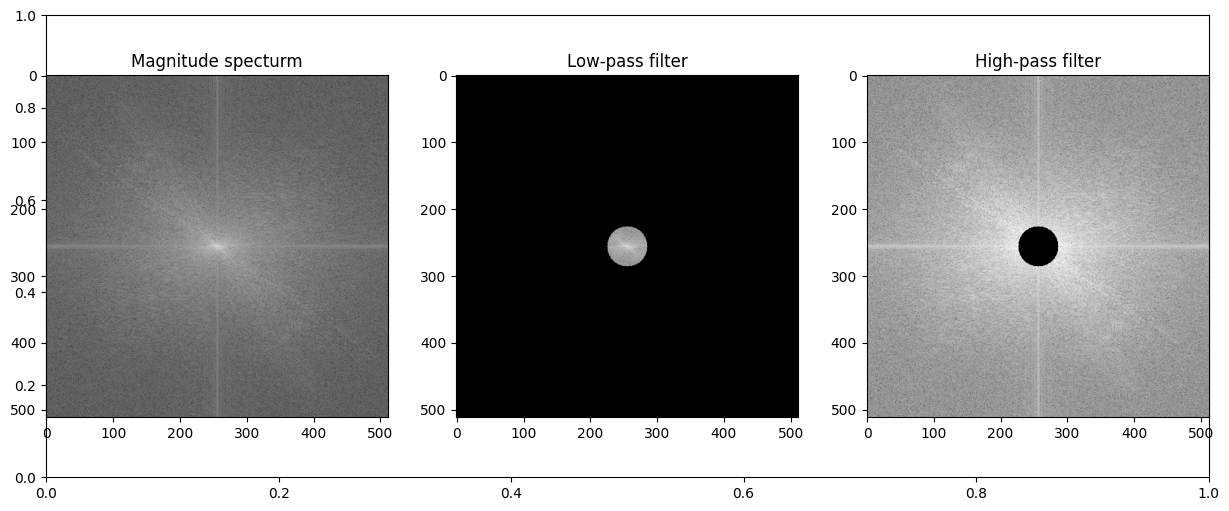

In [18]:
path = "images/lenna.png"
img_raw = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()

fshift = np.fft.fftshift(np.fft.fft2(img_raw))
magnitude_spectrum = 20*np.log(np.abs(fshift))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(magnitude_spectrum, cmap='gray')
ax.set_title("Magnitude specturm")

# Apply Low-pass filter
filter_low = create_circular_mask(img_raw, 30)
img_filtered_low = magnitude_spectrum * filter_low
ax = fig.add_subplot(1, 3, 2)
ax.imshow(img_filtered_low, cmap='gray')
ax.set_title("Low-pass filter")

# Apply High-pass filter
filter_high = 1 - create_circular_mask(img_raw, 30)
img_filtered_high = magnitude_spectrum * filter_high
ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_filtered_high, cmap='gray')
ax.set_title("High-pass filter")

4. Below are images of what the magnitude spectrum should look like before and after applying the the filters. Briefly explain what the filters are actually doing to the image. How do you expect it to change the image after the image is converted back from the frequency domain?

![comparison image](images/comparison.png)

Answer:
    
4. The filters will remove the low or high frequencies in the image. If after removing some frequencies in Fourier transformed spectrum then recovering the image again, depending on which frequencies are filtered, the converted may contain basic structures or important part of the image.

5. Perform an inverse Fourier transform on the spectra that have been filtered.
6. Finally, observe and discuss the impact that the LPF and HPF have had on the image based on the answer you gave in part 4. of the assignment. What would be a possible application for using the High Pass Filter or the Low Pass Filter?

Text(0.5, 1.0, 'From High-pass filter')

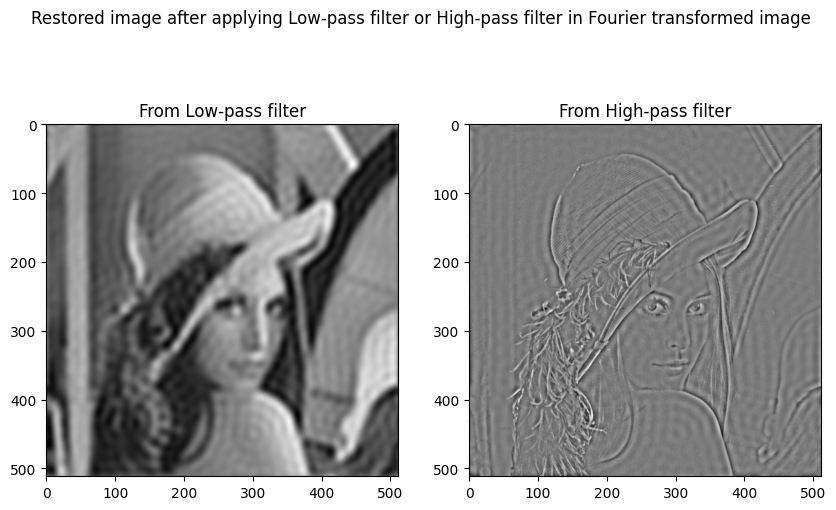

In [32]:
fshift = np.fft.fftshift(np.fft.fft2(img_raw))

fig = plt.figure(figsize=(10, 6))
fig.suptitle("Restored image after applying Low-pass filter or High-pass filter in Fourier transformed image")

ax = fig.add_subplot(121)
f_ishift = np.fft.ifftshift(fshift * filter_low)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
ax.imshow(img_back, cmap='gray')
ax.set_title("From Low-pass filter")

ax = fig.add_subplot(122)
f_ishift = np.fft.ifftshift(fshift * filter_high)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
ax.imshow(img_back, cmap='gray')
ax.set_title("From High-pass filter")

Answer:

6. For Low-pass filtering, the reconstructed image is blurred than the original image. For the High-pass filtering, the reconstructed image contains the edges only.

Therefore, Low-pass filtering can be used to remove noise whereas High-pass filtering can be used to detect high variated features such as edges.